# Working with time series, frequency series, and unit conversion

In this notebook, we show some of the most useful features of the [timeseries](../series.rst) module. To do so, we will analyze a fake gravitational-wave signal. We will also show the [frequencyseries](../series.rst) module and the [unitconv](../unitconv.rst) modules.

First, let's generate this signal. 

(This notebook is meant to be converted in Sphinx documentation and not used directly.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit import timeseries as ts
from kuibit import series
from kuibit import unitconv as uc
from kuibit.gw_utils import luminosity_distance_to_redshift

%matplotlib inline

In [2]:
t = np.linspace(0, 20, 5000)
y = np.sin(t)

# Generate a TimeSeries by providing the times and the values of the series
gw = ts.TimeSeries(t, y)

To access the times and the values, use ``gw.t`` and ``gw.y``. You can also iterate over the series with a for loop yielding the elements `(t, y)` at each iteration of the loop. For example.

In [3]:
for tt, yy in gw:
    print(tt, yy)

0.0 0.0
0.004000800160032006 0.004000789486971321
0.008001600320064013 0.008001514935783532
0.012002400480096018 0.012002112309302542
0.016003200640128026 0.016002517572444287
0.020004000800160033 0.020002666693199687
0.024004800960192037 0.024002495643659576
0.028005601120224044 0.028001940401039562
0.03200640128025605 0.03200093694870479
0.03600720144028806 0.03599942127719461
0.040008001600320066 0.03999732938524717
0.04400880176035207 0.0439945972808238
0.048009601920384073 0.04799116098213332
0.05201040208041608 0.05198695651865616
0.05601120224044809 0.055981919932168285
0.060012002400480095 0.059975987277764924
0.0640128025605121 0.06396909462488413
0.0680136027205441 0.06796117805833003
0.07201440288057612 0.07195217367929596
0.07601520304060812 0.07594201760638712
0.08001600320064013 0.07993064597664322
0.08401680336067213 0.08391799494656059
0.08801760352070415 0.08790400069311417
0.09201840368073615 0.09188859941477902
0.09601920384076815 0.09587172733255157
0.10002000400080

2.8885777155431085 0.2503240413213195
2.8925785157031405 0.24644862513261315
2.8965793158631725 0.24256926419342192
2.9005801160232045 0.23868602059827343
2.9045809161832365 0.23479895650384244
2.9085817163432686 0.23090813412795622
2.9125825165033006 0.22701361574859838
2.9165833166633326 0.2231154637029123
2.9205841168233646 0.2192137403862031
2.9245849169833966 0.21530850825093906
2.9285857171434286 0.21139982980575198
2.9325865173034606 0.20748776761443657
2.9365873174634927 0.20357238429494912
2.9405881176235247 0.19965374251840504
2.9445889177835567 0.19573190500807597
2.9485897179435887 0.19180693453838563
2.9525905181036207 0.18787889393390508
2.9565913182636527 0.18394784606834713
2.9605921184236847 0.18001385386355995
2.9645929185837168 0.17607698028851995
2.9685937187437488 0.17213728835832381
2.972594518903781 0.1681948411331799
2.976595319063813 0.1642497017173989
2.980596119223845 0.16030193325838366
2.984596919383877 0.15635159894561856
2.988597719543909 0.15239876200965


5.793158631726345 -0.47064942463262455
5.797159431886377 -0.4671156801387877
5.801160232046409 -0.4635744588136043
5.805161032206441 -0.46002581733921055
5.809161832366473 -0.45646981251651236
5.813162632526505 -0.4529065012642763
5.817163432686537 -0.4493359406182183
5.821164232846569 -0.4457581877300909
5.825165033006601 -0.4421732998667685
5.829165833166633 -0.4385813344093305
5.833166633326665 -0.43498234885214293
5.837167433486697 -0.4313764008019384
5.841168233646729 -0.42776354797689364
5.845169033806761 -0.424143848205706
5.849169833966793 -0.42051735942666746
5.853170634126825 -0.4168841396867376
5.857171434286857 -0.41324424714061425
5.861172234446889 -0.40959774004980276
5.865173034606921 -0.4059446767816834
5.869173834766953 -0.40228511580857707
5.873174634926985 -0.39861911570680936
5.877175435087017 -0.39494673515577317
5.881176235247049 -0.39126803293698914
5.885177035407081 -0.387583067933165
5.889177835567113 -0.383891899127253
5.893178635727145 -0.38019458560150576
5

0.5132787172059139
8.889777955591118 0.509841043883392
8.89377875575115 0.5063952098510914
8.897779555911182 0.5029412702643431
8.901780356071214 0.49947928040821854
8.905781156231246 0.49600929569664487
8.909781956391278 0.49253137167151795
8.91378275655131 0.4890455640018133
8.917783556711342 0.4855519284826952
8.921784356871374 0.48205052103462315
8.925785157031406 0.47854139770245746
8.929785957191438 0.47502461465456153
8.93378675735147 0.47150022818190335
8.937787557511502 0.4679682946971539
8.941788357671534 0.46442887073378486
8.945789157831566 0.46088201294516307
8.949789957991598 0.45732777810364417
8.95379075815163 0.45376622309966363
8.957791558311662 0.45019740494082633
8.961792358471694 0.44662138075099383
8.965793158631726 0.4430382077693703
8.969793958791758 0.43944794334958615
8.97379475895179 0.43585064495877995
8.977795559111822 0.43224637017667883
8.981796359271854 0.4286351766946766
8.985797159431886 0.42501712231491046
8.989797959591918 0.4213922649493357
8.993798

11.966393278655731 -0.5646237675988803
11.970394078815763 -0.561317203557922
11.974394878975795 -0.5580016548601832
11.978395679135827 -0.5546771745755977
11.98239647929586 -0.5513438159170625
11.986397279455892 -0.5480016322395848
11.990398079615924 -0.5446506770394283
11.994398879775956 -0.5412910039532575
11.998399679935988 -0.5379226667572781
12.00240048009602 -0.5345457193663773
12.006401280256052 -0.5311602158332602
12.010402080416084 -0.5277662103475849
12.014402880576116 -0.5243637572350945
12.018403680736148 -0.5209529109567488
12.02240448089618 -0.5175337261078512
12.026405281056212 -0.5141062574171756
12.030406081216244 -0.5106705597460903
12.034406881376276 -0.5072266880876798
12.038407681536308 -0.5037746975658645
12.04240848169634 -0.5003146434345183
12.046409281856372 -0.4968465810765844
12.050410082016404 -0.4933705660031889
12.054410882176436 -0.4898866538527519
12.058411682336468 -0.48639490039009703
12.0624124824965 -0.4828953615055592
12.066413282656532 -0.479388093

14.758951790358072 0.8128401006888406
14.762952590518104 0.8105031879707019
14.766953390678136 0.8081533020300832
14.770954190838168 0.8057904804801532
14.7749549909982 0.803414761141133
14.778955791158232 0.8010261820396901
14.782956591318264 0.798624781408331
14.786957391478296 0.7962105976847879
14.790958191638328 0.7937836695114043
14.79495899179836 0.7913440357345162
14.798959791958392 0.7888917354038302
14.802960592118424 0.7864268077717987
14.806961392278456 0.7839492922929915
14.810962192438488 0.7814592286234642
14.81496299259852 0.7789566566201235
14.818963792758552 0.7764416163400892
14.822964592918584 0.7739141480400534
14.826965393078616 0.7713742921756355
14.830966193238648 0.768822089400735
14.83496699339868 0.7662575805668809
14.838967793558712 0.7636808067225774
14.842968593718744 0.7610918091126475
14.846969393878776 0.758490629177572
14.850970194038808 0.7558773085528272
14.85497099419884 0.7532518890682173
14.858971794358872 0.7506144127472059
14.862972594518904 0.7

17.783556711342268 -0.8752726129129145
17.7875575115023 -0.8733307066321846
17.79155831166233 -0.8713748214878007
17.795559111822364 -0.8694049887864048
17.799559911982396 -0.867421240057889
17.803560712142428 -0.8654236070548901
17.80756151230246 -0.8634121217522823
17.81156231246249 -0.861386816346665
17.815563112622524 -0.8593477232558471
17.819563912782556 -0.8572948751183287
17.823564712942588 -0.8552283047927784
17.82756551310262 -0.8531480453575072
17.831566313262652 -0.8510541301099395
17.835567113422684 -0.8489465925660793
17.839567913582716 -0.8468254664599748
17.843568713742748 -0.8446907857431778
17.84756951390278 -0.8425425845842001
17.851570314062812 -0.840380897367967
17.855571114222844 -0.8382057586952667
17.859571914382876 -0.8360172033821966
17.863572714542908 -0.8338152664596061
17.86757351470294 -0.8315999831725356
17.871574314862972 -0.8293713889796522
17.875575115023004 -0.8271295195526829
17.879575915183036 -0.8248744107758428
17.883576715343068 -0.82260609874526

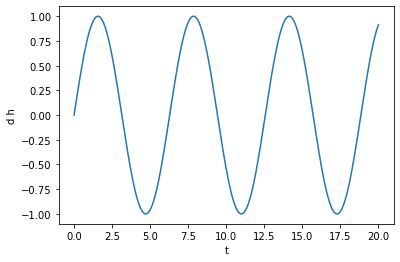

In [4]:
def plot(ser, lab1="d h", lab2="t", *args, **kwargs):
    """Plot Series ser with labels"""
    plt.ylabel(lab1)
    plt.xlabel(lab2)
    plt.plot(ser, *args, **kwargs)
    
plot(gw)

Let's make this more interesting: we square the signal and add Gaussian noise. [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) support directly using all the basic mathematical operations in Python and NumPy, so we can easily square the signal and add another TimeSeries to it.

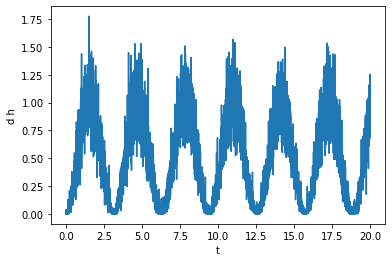

In [5]:
noise = np.random.normal(0, 0.1, len(gw))  # Here we used len() on the TimeSeries
noise_ts = ts.TimeSeries(t, noise)

gw += noise_ts
gw **= 2

plot(gw)

To analyze this signal, first we will smooth it. To do that, we will use the [savgol_smooth_time](../timeseries_ref.html#kuibit.timeseries.TimeSeries.savgol_smooth_time) method, which is a generalized "running average" filter. This method requires length of time over which we want to smooth the data.

In [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) there are always two different methods to do the same task, one with imperative verb (e.g., smooth), and the other with the past tense (e.g., smoothed). The first modifies the data, the second returns a new `TimeSeries` with the operation applied. Here, we will find what smoothing length to use by trial and error, so we will use the second method. 

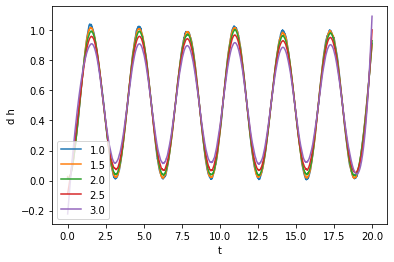

In [6]:
tsmooth = np.linspace(1, 3, 5)

for tsm in tsmooth:
    smoothed = gw.savgol_smoothed_time(tsm)
    plot(smoothed, label=tsm)
plt.legend()

From visual inspection it looks like that ``tsmooth = 1.5`` will work yield a clean series faithful to the original one.

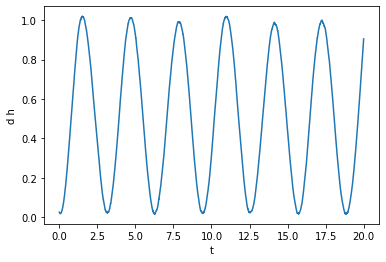

In [7]:
gw.savgol_smooth_time(1.5)
plot(gw)

Next, for fun, we can compute integrals and derivatives. For instance, we can compute what is the integral from 5 to 10.

The integral from 5 to 10 is 2.1872


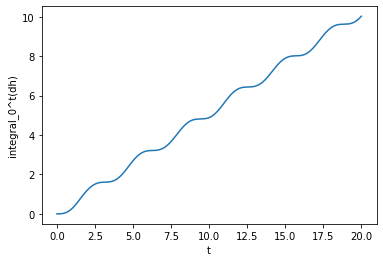

In [8]:
gw_int = gw.integrated()
a = 5
b = 10
print(f"The integral from {a} to {b} is {gw_int(b) - gw_int(a):.4f}")
plot(gw_int, lab1="integral_0^t(dh)")

Here, we showed a very powerful feature of `TimeSeries`: you can call them on a specific time (as we did we ``gw_int(b)``). This is done using splines to interpolate to the points that are not available. Splines can also be used to take derivatives. Alternatively, one can simply take the finite (central) difference. Let's see what's the derivative of ``gw`` using splines and finite difference.

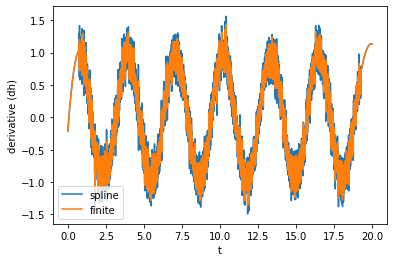

In [9]:
gw_spline_der = gw.spline_differentiated()
gw_numer_der = gw.differentiated()

plot(gw_spline_der, label='spline')
plot(gw_numer_der, lab1="derivative (dh)", label='finite')
plt.legend()

Clearly, derivatives will be noisier than the actual data, so often it is convenient to smooth them out as shown before.

TimeSeries support complex signals. Now, we will create one using `gw` itself. We will copy `gw`, time-shift it, find the common time interval with the original `gw`, and use that as a the imaginary part.

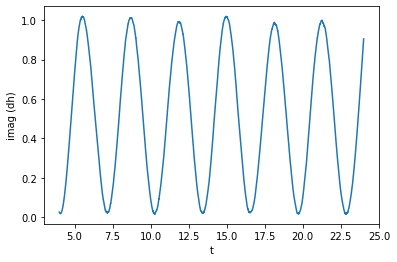

In [10]:
gw_imag = gw.copy()  # It is important to deep copy the object
gw_imag.time_shift(4)

plot(gw_imag, lab1 ="imag (dh)")

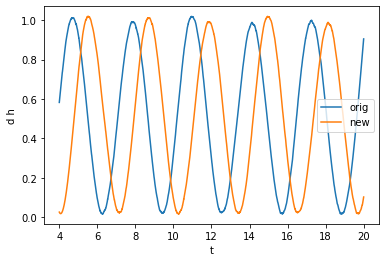

In [11]:
gw, gw_imag = series.sample_common([gw, gw_imag], resample=True)  # Resampling to common times

plot(gw, label="orig")
plot(gw_imag, label="new")
plt.legend()

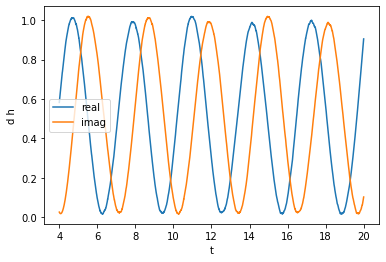

In [12]:
gw_complex = ts.TimeSeries(gw.t, gw.y + 1j * gw_imag.y)

plot(gw_complex.real(), label="real")
plot(gw_complex.imag(), label="imag")
plt.legend()

We can also compute the phase and absolute value. In particular, we will compute the unfolded phase (no wrapping over $2\pi$)

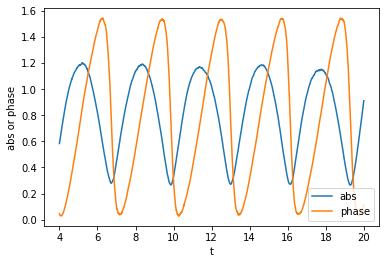

In [13]:
plot(gw_complex.abs(), label='abs')
plot(gw_complex.unfolded_phase(), lab1="abs or phase", label='phase')
plt.legend()

Here, the unfolded phase looks a little bit unusual. This is because we made up the signal.

We can also compute the frequency of the phase, which we can directly smooth.

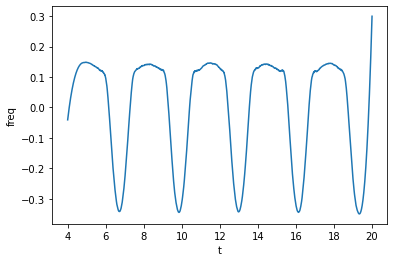

In [14]:
plot(gw_complex.phase_frequency(tsmooth=1.5), lab1="freq")

Next, we will take a Fourier transform. Before, let's pretend that the signal was in geometrized units (as in simulations), and let's make it physical assuming a scale of $M = 1 M_\odot$. For that, use the [unitconv](../unitconv.rst) module. We define a CU object that knows how to convert units.

In [15]:
CU = uc.geom_umass_msun(1) 

# How to convert from geometrized length to physical length?
# Simply multiply times CU.length. Let's check that it is 1.477 km
CU.length  # m

1476.6436994724972

Now we rescale `gw`, assuming that `y` is strain times distance (as usually is). Let's assume a distance of 500 Mpc.

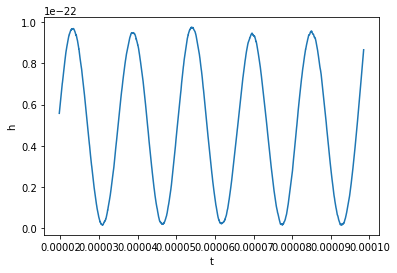

In [16]:
d_Mpc = 500

# inverse = True means from geometrized to physical
gw_physical = gw_complex.time_unit_changed(CU.time, inverse=True)  

gw_physical *= CU.length  # dh -> dh physical
# Now just the strain, since we assume a distance
gw_physical /= (d_Mpc * uc.MEGAPARSEC_SI)

# We have to manually add the redshift
gw_physical.redshifted(luminosity_distance_to_redshift(d_Mpc))

plot(gw_physical.real(), lab1="h")

Okay, now before taking the Fourier transform, we will remove the mean and window our signal. A Tukey window will work.

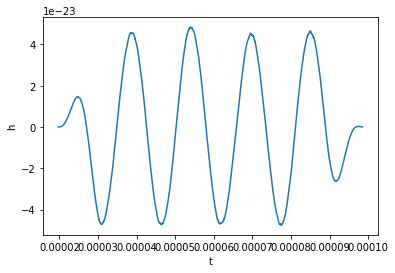

In [17]:
gw_physical.mean_remove()
gw_physical.tukey_window(0.3)
plot(gw_physical.real(), lab1="h")

Finally, we can take the Fourier transform. This is easy to do:

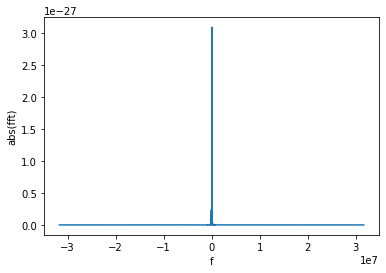

In [18]:
gw_fft = gw_physical.to_FrequencySeries()

# Plotting the amplitude of the Fourier transform
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

The new object is a `FrequencySeries`. It is very similar to a `TimeSeries` and it shares several properties, methods, and features. 

Let's restrict to only positive frequencies close to zero.

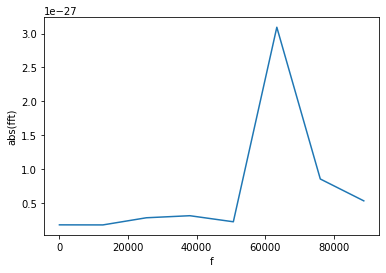

In [19]:
gw_fft.crop(0, 1e5)
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

We can find the frequency of that peak! For this, we find all the peaks with amplitude larger than 1e-27.

Frequency: 64215.73


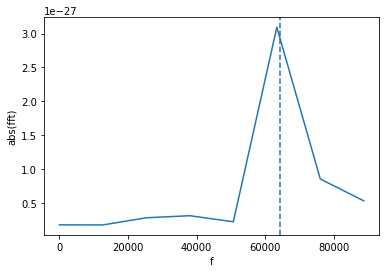

In [20]:
f_peak = gw_fft.peaks_frequencies(1e-27)[0]

print(f"Frequency: {f_peak:.2f}")
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")
plt.axvline(f_peak, ls = 'dashed')

The line is not on the maximum because we use a quadratic interpolation to find a more accurate location of the peak.

Sometimes, it is useful to ignore some data (or example, when we know that the data is invalid). `Series` objects support _masks_ to mark the points we want to ignore. Most functions work transparently with masks: for example, if you ask for the mean of a `Series`, the masked point will be ignored. Other functions do not support masks (most notably, splines). In that case, it is best to completely remove the masked points and work with clean data.

In [21]:
# Let's mask all the point in the spectrum with value larger than 1e-27

spectrum = gw_fft.abs()

print(f"Maximum without mask {spectrum.max():.3e}")

# Apply mask
spectrum.mask_greater(1e-27)

print(f"Maximum with mask {spectrum.max():.3e}")

print(f"Length with mask {len(spectrum)}")

# Remove points
spectrum.mask_remove()

print(f"Length after having removed the masked points {len(spectrum)}")

Maximum without mask 3.093e-27
Maximum with mask 8.538e-28
Length with mask 8
Length after having removed the masked points 7
